# **Churn de Clientes**


A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

📌 **Extração (E - Extract)**

1° Passo: importar os dados da API da Telecom X. Esses dados estão disponíveis no formato JSON e contêm informações essenciais sobre os clientes, incluindo dados demográficos, tipo de serviço contratado e status de evasão.

In [2]:
#importando as bibliotecas
import pandas as pd
import requests
import json
import numpy as np

In [3]:
#Carregar os dados diretamente da API.
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
dados = requests.get(url)
resultado = json.loads(dados.text)

In [4]:
#converter os dados para um DataFrame do Pandas ja normalizando os campos aninhados em coluna separadas.
df = pd.json_normalize(resultado)

In [5]:
#olhar o dataframe
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
#verificar o tipo da variavel df.
type(df)

pandas.core.frame.DataFrame

🔧 **Transformação (T - Transform)**

2° Passo: Conhecendo o Dataset, entender a estrutura e o significado de suas colunas ajudará a identificar quais variáveis são mais relevantes para a análise de evasão de clientes.

In [7]:
#verificar qtd linhas e colunas
df.shape

(7267, 21)

In [8]:
#verificar nomes das colunas
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [9]:
#verificar os tipos de dados das colunas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [10]:
#verificar uma coluna onde tipo object
df['customerID']

,customerID
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7262,9987-LUTYD
7263,9992-RRAMN
7264,9992-UJOEL
7265,9993-LHIEB


In [11]:
#verificar uma coluna onde tipo int
df['customer.SeniorCitizen']

,customer.SeniorCitizen
0,0
1,0
2,0
3,1
4,1
...,...
7262,0
7263,0
7264,0
7265,0


In [12]:
#verificar uma coluna onde tipo float
df['account.Charges.Monthly']

,account.Charges.Monthly
0,65.60
1,59.90
2,73.90
3,98.00
4,83.90
...,...
7262,55.15
7263,85.10
7264,50.30
7265,67.85


In [13]:
#Consultar o dicionário para entender melhor os significados das variáveis.
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_dicionario.md"
resposta = requests.get(url)

print(resposta.text)


#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de co

2.1: Verificando Inconsistências nos Dados que possam afetar a análise, como valores ausentes, duplicados, erros de formatação e inconsistências nas categorias.

In [50]:
# Converter para float (valores inválidos viram NaN)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [51]:
# verificando se há valores ausentes (nulos) em cada coluna. (11 - valores nulos)
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [53]:
#tratar os nulos, vou colocar o 0 mantendo dados e considerando que esses clientes não tiveram cobrança:
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)



In [55]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [56]:
# visualizando os tipos únicos presentes em cada coluna (***a coluna churn tem informações vazias " "***)
colunas = df.columns.tolist()
valorescolunas = df[colunas].apply(lambda x: x.unique())
valorescolunas

,0
customerID,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
Churn,"[No, Yes, ]"
customer.gender,"[Female, Male]"
customer.SeniorCitizen,"[0, 1]"
customer.Partner,"[Yes, No]"
customer.Dependents,"[Yes, No]"
customer.tenure,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
phone.PhoneService,"[Yes, No]"
phone.MultipleLines,"[No, Yes, No phone service]"
internet.InternetService,"[DSL, Fiber optic, No]"


In [57]:
#olhando as informações vazias.
df.query('Churn == ""')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


2.2 Tratando as Inconsistências Ajustando os dados para garantir que estejam completos e coerentes, preparando-os para as próximas etapas da análise.

In [59]:
#removendo as 224 linhas que na coluna churn estao vazias
df_tratado = df.query('Churn != ""').copy()
df_tratado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


2.3 Criar a coluna "Contas_Diarias". Utilizar o faturamento mensal para calcular o valor diário.

In [61]:
# usando a coluna account.Charges.Monthly	charges = total de todos os serviços do cliente por mês.
#Supondo que todos os meses tenham 30 dias (como uma simplificação).

df_tratado['Contas_Diarias'] = df_tratado['account.Charges.Monthly'] / 30
df_tratado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


Padronização e Transformação de Dados Durante essa fase,  converter valores textuais como "Sim" e "Não" em valores binários (1 e 0), facilitando o processamento matemático e a aplicação de modelos analíticos.



In [62]:
#verificando se os valores têm espaços ou letras diferentes
colunas_binarias = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']
for col in colunas_binarias:
    print(col, df_tratado[col].unique())

Churn ['No' 'Yes']
customer.Partner ['Yes' 'No']
customer.Dependents ['Yes' 'No']
phone.PhoneService ['Yes' 'No']
account.PaperlessBilling ['Yes' 'No']


In [63]:
#Padronizando os valores e aplicando o map
for col in colunas_binarias:
    df_tratado[col] = df_tratado[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
df_tratado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [64]:
#validando se a padronização deu certo
for col in colunas_binarias:
    print(col, df_tratado[col].unique())


Churn [0 1]
customer.Partner [1 0]
customer.Dependents [1 0]
phone.PhoneService [1 0]
account.PaperlessBilling [1 0]


📊 Carga e Análise (L - Load & Analysis)

3° Passo: Análise Descritiva

In [67]:
#calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.
df_tratado.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [68]:
#media das colunas numericas agrupado por churn
df_tratado.groupby('Churn').mean(numeric_only=True)

,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
Churn,,,,,,,,,
0,0.128721,0.528218,0.344801,37.569965,0.901044,0.535562,61.265124,2549.911442,2.042171
1,0.254682,0.357945,0.174425,17.979133,0.909042,0.749064,74.441332,1531.796094,2.481378


*3.1* Distribuição da Evasão -Utilize gráficos para visualizar a proporção de clientes que permaneceram e os que saíram.

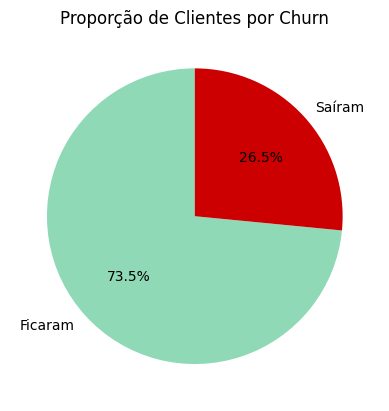

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conta os valores
churn_counts = df_tratado['Churn'].value_counts()
labels = ['Ficaram', 'Saíram']

# Cores personalizadas: verde para quem ficou, vermelho para quem saiu
cores_personalizadas = ['#8fd9b6', '#cc0000']  # Verde e vermelho

# Gráfico de pizza
plt.pie(churn_counts,
        labels=labels,
        autopct='%1.1f%%',
        colors=cores_personalizadas,
        startangle=90)  # deixa o gráfico mais alinhado

plt.title('Proporção de Clientes por Churn')
plt.show()



3.2 Contagem de Evasão por Variáveis Categóricas - explorar como a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.

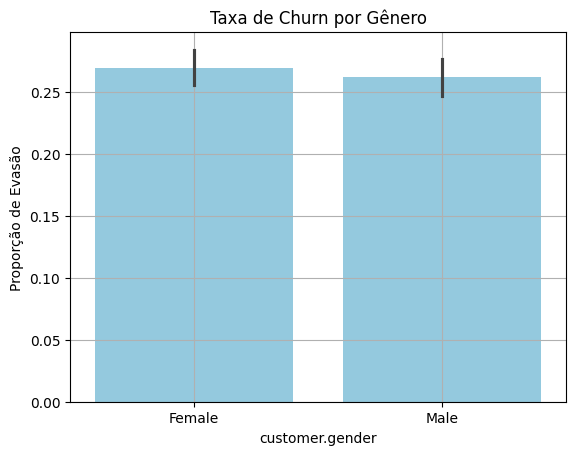

In [70]:
#1. Gênero vs Churn

# Agrupa e calcula a média de churn por gênero
ordem = df_tratado.groupby('customer.gender')['Churn'].mean().sort_values(ascending=False).index

sns.barplot(x='customer.gender', y='Churn', data=df_tratado, order = ordem ,color='skyblue')
plt.title('Taxa de Churn por Gênero')
plt.ylabel('Proporção de Evasão')
plt.grid()
plt.show()

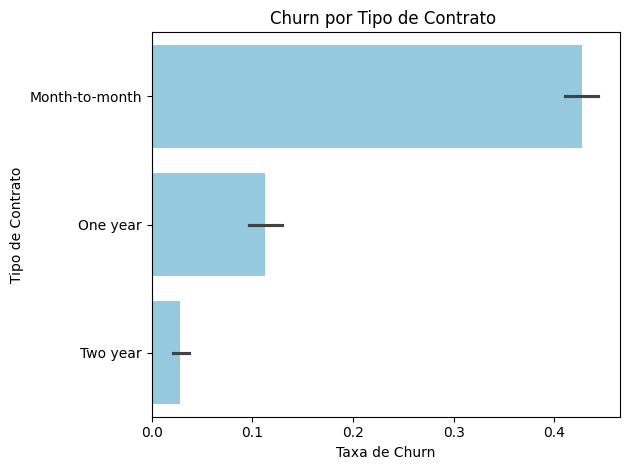

In [71]:
#Tipo de Contrato vs Churn

# Agrupa e calcula a média de churn por tipo de contrato
ordem = df_tratado.groupby('account.Contract')['Churn'].mean().sort_values(ascending=False).index

# Gráfico invertido (contrato no eixo Y, churn no eixo X)
sns.barplot(y='account.Contract', x='Churn', data=df_tratado, order=ordem, color='skyblue')

plt.title('Churn por Tipo de Contrato ')
plt.yticks(rotation=0)  # geralmente não precisa girar o eixo Y
plt.xlabel('Taxa de Churn')
plt.ylabel('Tipo de Contrato')
plt.tight_layout()
plt.show()



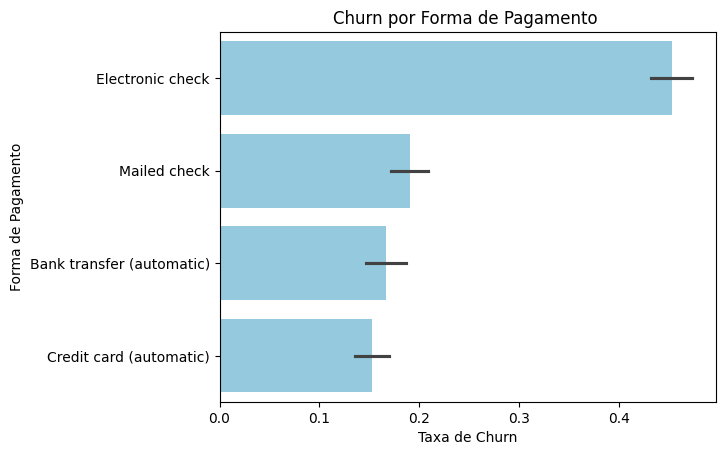

In [72]:
#Forma de Pagamento vs Churn

# Agrupa e calcula a média de churn por forma de pagamento
ordem = df_tratado.groupby('account.PaymentMethod')['Churn'].mean().sort_values(ascending=False).index

# Gráfico invertido (horizontal)
sns.barplot(y='account.PaymentMethod', x='Churn', data=df_tratado, order=ordem, color='skyblue')

plt.title('Churn por Forma de Pagamento ')
plt.xlabel('Taxa de Churn')
plt.ylabel('Forma de Pagamento')
plt.show()


3.3 Contagem de Evasão por Variáveis Numéricas explorar como variáveis numéricas, como "total gasto" ou "tempo de contrato", se distribuem entre clientes que cancelaram (evasão) e os que não cancelaram.

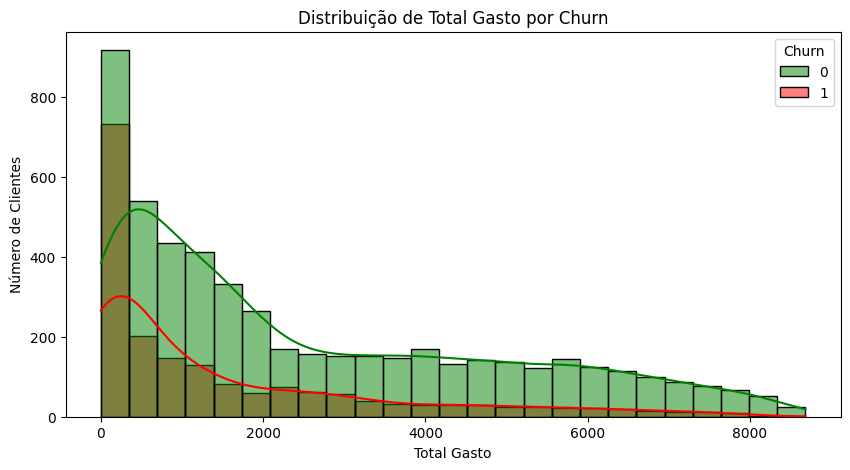

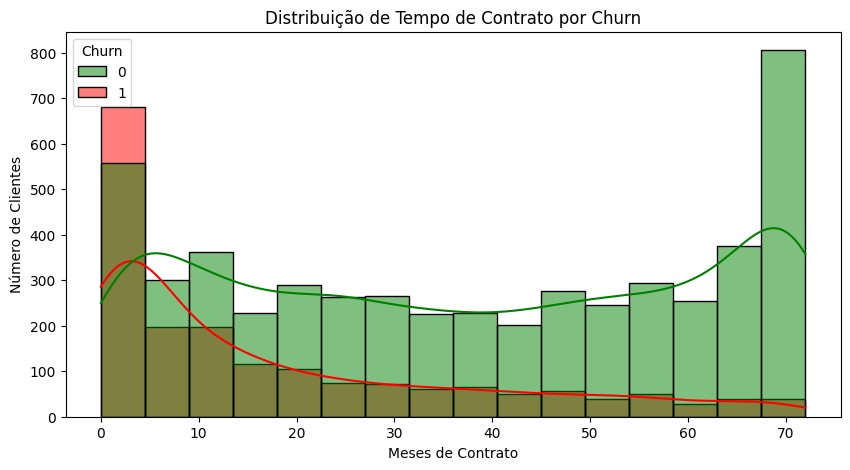

In [73]:

# Charges.Total (Total gasto)
plt.figure(figsize=(10, 5))
sns.histplot(data=df_tratado, x='account.Charges.Total', hue='Churn', kde=True, palette={0: 'green', 1: 'red'})
plt.title('Distribuição de Total Gasto por Churn')
plt.xlabel('Total Gasto')
plt.ylabel('Número de Clientes')
plt.show()

# Tenure (Tempo de contrato)
plt.figure(figsize=(10, 5))
sns.histplot(data=df_tratado, x='customer.tenure', hue='Churn', kde=True, palette={0: 'green', 1: 'red'})
plt.title('Distribuição de Tempo de Contrato por Churn')
plt.xlabel('Meses de Contrato')
plt.ylabel('Número de Clientes')
plt.show()


In [82]:
# Criando faixas (ex: 0–12, 13–24, ..., até 72 meses)
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df_tratado['tenure_group'] = pd.cut(df_tratado['customer.tenure'], bins=bins, labels=labels)


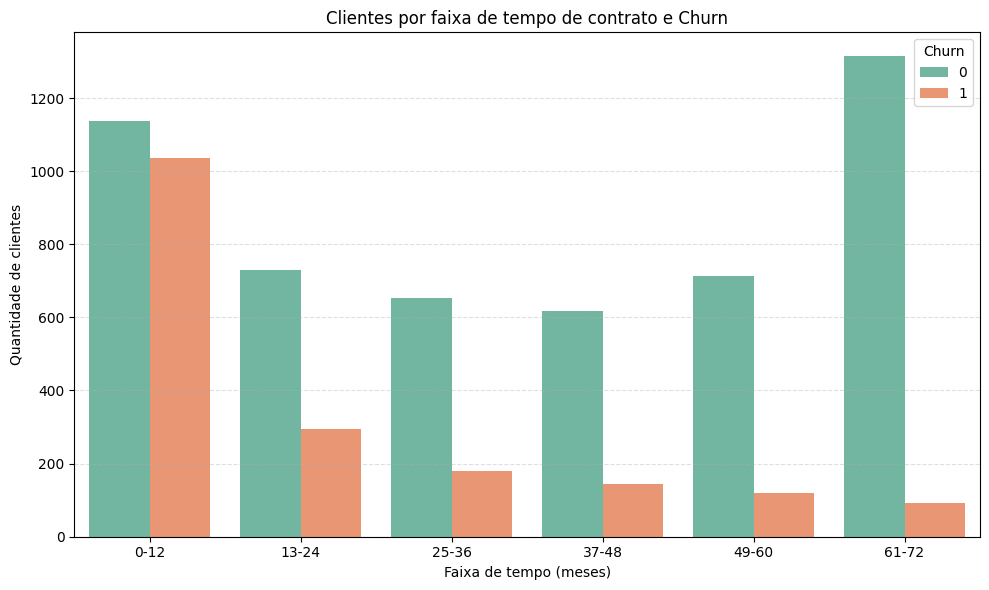

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_tratado, x='tenure_group', hue='Churn', palette='Set2')

plt.title('Clientes por faixa de tempo de contrato e Churn')
plt.xlabel('Faixa de tempo (meses)')
plt.ylabel('Quantidade de clientes')
plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#📌 **Relatório Final — Análise de Evasão de Clientes (Churn)**

#🎯 **Introdução**

A evasão de clientes, conhecida como churn, representa a saída voluntária de consumidores de um serviço. Este projeto teve como objetivo compreender os padrões que influenciam o cancelamento, oferecendo insights estratégicos que ajudem a melhorar a retenção. Utilizamos um conjunto de dados de uma empresa de telecomunicações com informações sobre perfil, consumo e tipo de contrato dos clientes.

# **🔁 Extração (E - Extract)**

Os dados dos clientes da Telecom X estavam disponíveis no formato **JSON** por meio de uma **API REST**. Essa extração foi o ponto inicial do processo de ETL e essencial para acessar informações.

#🧹**Limpeza e Tratamento de Dados**

Foram aplicados diversos passos para garantir a qualidade dos dados e padronização:

**Exploração inicial**

*   Tipo da variável principal (type(df))
*   Quantidade de linhas e colunas (df.shape)
*   Tipos de dados por coluna (df.info())


**Conversão de tipos**

*   Coluna account.Charges.Total foi convertida de object para float usando pd.to_numeric(errors='coerce').
*   Após a conversão, 11 valores nulos foram tratados com fillna(0).

**Remoção de dados inconsistentes**

*   Foi identificado que a coluna Churn continha 224 valores vazios (""), que foram removidos

**Criação de coluna derivada**

*  Contas_Diarias foi criada a partir de account.Charges.Monthly dividida por 30 dias.


**Padronização de colunas binárias**

*   Colunas como customer.Partner, customer.Dependents, phone.PhoneService e account.PaperlessBilling foram convertidas para valores 0/1 após limpeza de espaços e letras.




#**📊 Análise Exploratória de Dados**

**Estatísticas gerais**

*   df_tratado.describe()

**Métricas por Churn**

*   df_tratado.groupby('Churn').mean(numeric_only=True)

**Visualizações (em gráficos)**

*   Contagem de churn por tipo de contrato mostrou que clientes com contrato mensal têm maior propensão a sair.
*   Distribuição de tempo de contrato (customer.tenure) revelou que churn é mais comum em clientes com até 12 meses de permanência.
*   Distribuição de gastos mensais e totais apresentou correlação entre maior valor mensal e maior evasão.


#**💡 Conclusões e Insights**



*   O tempo de contrato é um fator chave: clientes que saem ficam em média **apenas 18 meses**, enquanto os que permanecem chegam a **38 meses**.
*   **A cobrança mensal mais alta** está associada a maior churn — possível percepção de preço elevado.
*   Clientes **sem dependentes ou parceiros** têm maior taxa de cancelamento.
*   O churn é maior entre **idosos**, o que pode sugerir necessidade de revisão dos serviços para esse público.

#**🎯 Recomendações**



*   Criar campanhas de **retenção nos primeiros 12 meses**, período crítico de abandono.
*   Oferecer **incentivos para migração para contratos anuais ou bienais**, com descontos ou bônus.
*   Reavaliar pacotes voltados para **clientes idosos** e para aqueles com perfil individual (sem dependentes/parceiros).
*   Monitorar clientes com **valores mensais elevados** e propor pacotes personalizados de maior valor percebido.
*   Desenvolver **alertas preditivos** baseados em tempo de contrato e padrão de gastos para antecipar o risco de churn.

#Extra: Análise de Correlação entre Variáveis

In [84]:
df_tratado.corr(numeric_only=True)['Churn'].sort_values(ascending=False)


,Churn
Churn,1.000000
account.Charges.Monthly,0.193356
Contas_Diarias,0.193356
account.PaperlessBilling,0.191825
customer.SeniorCitizen,0.150889
phone.PhoneService,0.011942
customer.Partner,-0.150448
customer.Dependents,-0.164221
account.Charges.Total,-0.198324
customer.tenure,-0.352229
